In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Neural Networks Learning with Scikit-Learn

`scikit-learn` is a large, well-documented and widely used library for machine learning. It contains aslo a support for neural networks. Namely two classes 
* `MLPClassifier` is a class implementing classifiers based on multi-layered neural networks, and 
* `MLPRegressor` is a class implementing regressing (i.e., approximating functions) with multilayered neural networks.

## MLPRegressor 

is an estimator available as a part of the neural_network module of `sklearn` for performing regression tasks using a multi-layer perceptron.

Let us start with a simple example in that we will train a neural network to compute an approximation of the function 
$$2 sin(3x+1)+3$$ on the interval $\langle -3, 5 \rangle$.

### Preparing Data
At first we will prepare a training and testing set.

In [2]:
X = np.linspace(-3, 5, 41).reshape(-1,1)
y = 2 * np.sin(3 * X + 1) + 3
print("X:",X)
print("y:",y)

X: [[-3. ]
 [-2.8]
 [-2.6]
 [-2.4]
 [-2.2]
 [-2. ]
 [-1.8]
 [-1.6]
 [-1.4]
 [-1.2]
 [-1. ]
 [-0.8]
 [-0.6]
 [-0.4]
 [-0.2]
 [ 0. ]
 [ 0.2]
 [ 0.4]
 [ 0.6]
 [ 0.8]
 [ 1. ]
 [ 1.2]
 [ 1.4]
 [ 1.6]
 [ 1.8]
 [ 2. ]
 [ 2.2]
 [ 2.4]
 [ 2.6]
 [ 2.8]
 [ 3. ]
 [ 3.2]
 [ 3.4]
 [ 3.6]
 [ 3.8]
 [ 4. ]
 [ 4.2]
 [ 4.4]
 [ 4.6]
 [ 4.8]
 [ 5. ]]
y: [[1.02128351]
 [1.20258381]
 [2.0117733 ]
 [3.16617881]
 [4.26253328]
 [4.91784855]
 [4.90320415]
 [4.22371578]
 [3.11674829]
 [1.96899726]
 [1.18140515]
 [1.02910054]
 [1.56528782]
 [2.60266134]
 [3.77883668]
 [4.68294197]
 [4.99914721]
 [4.61699281]
 [3.6699763 ]
 [2.4889178 ]
 [1.48639501]
 [1.01261799]
 [1.23309069]
 [2.07079564]
 [3.23309841]
 [4.3139732 ]
 [4.93583934]
 [4.88146111]
 [4.16983439]
 [3.04955085]
 [1.91195778]
 [1.15444916]
 [1.04164454]
 [1.61294983]
 [2.66879165]
 [3.84033407]
 [4.71832363]
 [4.99605331]
 [4.57650413]
 [3.60623671]
 [2.42419337]]


Note that we reshape the 1D vector `np.arange(-3, 5, 0.2)` into a 2D array, where each row is an input pattern. `MLPRegressor` expects that inputs are 2D arrays.

We can split manually `X` and `y` into a training and test sets, but there is a function `train_test_split` that does this for us.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n = 4
print(f"The first {n} inputs:")
print(X_test[:n])
print(f"The corresponding {n} labels:")
print(y_test[:n])

The first 4 inputs:
[[ 1.8]
 [-0.4]
 [-1.4]
 [ 2. ]]
The corresponding 4 labels:
[[3.23309841]
 [2.60266134]
 [3.11674829]
 [4.3139732 ]]


Using parameter `random_state=42` we can repeat exactly the same splitting arbitrarily.

### Training `MLPRegressor`

Class `MLPRegressor` implements a multi-layer perceptron (MLP) that trains using backpropagation with identity as the activation function in the output layer. Hence, the output neurons just output their potentials. In this way, such network can output any real value. The error function used by the network is the mean squared error.

`MLPRegressor` also supports regression with multi-dimensional outputs -  the desired output can be a vector.

In [4]:
from sklearn.neural_network import MLPRegressor

mlp_regressor  = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, y_train)

C:\Users\camil\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\camil\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=123)

In case there is only single output per input, `MLPRegressor` supposes that the sample outputs are in a vector (one-dimensional array). Let us adjust the outputs.

In [5]:
y_train = y_train.reshape(-1)
print(y_train.shape)

y_test = y_test.reshape(-1)
print(y_test.shape)

mlp_regressor.fit(X_train, y_train)

(32,)
(9,)


C:\Users\camil\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=123)

Now we can use the learned network to compute the approximation for the test samples.

In [6]:
y_preds = mlp_regressor.predict(X_test)

print(y_preds[:10] - y_test[:10])

[-0.89203162 -0.69426033 -0.83459531 -1.88275487 -1.47639892  2.05476636
 -0.505169    0.7365315  -0.08104157]


In [7]:
print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, y_train))

Test R^2 Score : -2.165
Training R^2 Score : -0.164


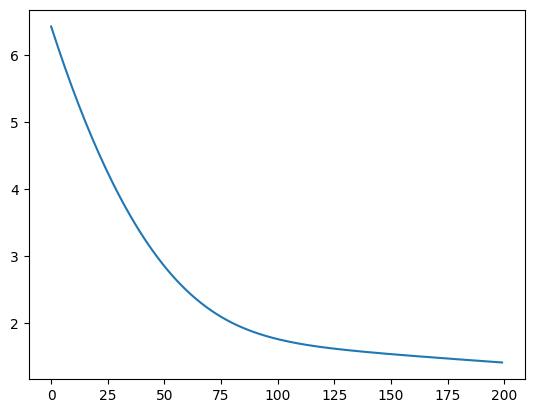

In [9]:
plt.plot(mlp_regressor.loss_curve_)

We can see that the network did not learn the function. In the documentation for `MLPRegressor` we can see that this regressor has many parameters with some default values. 

Let us try 500 iteration instead of the default 200, less hidden neurons - 10 instead of 100 in one hidden layer, sigmoid activation function (`'logistic'`) instead of the default `'relu'` and the learning algorithm `'lgfgs'` that is a variant of Newton's method with a limited memory.

In [10]:
mlp_regressor  = MLPRegressor(random_state=123, 
                              hidden_layer_sizes=[10], 
                              max_iter=5000, 
                              activation='logistic',
                              solver='lbfgs')
mlp_regressor.fit(X_train, y_train.ravel())

MLPRegressor(activation='logistic', hidden_layer_sizes=[10], max_iter=5000,
             random_state=123, solver='lbfgs')

In [11]:
print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, y_train))

Test R^2 Score : 0.119
Training R^2 Score : 0.999


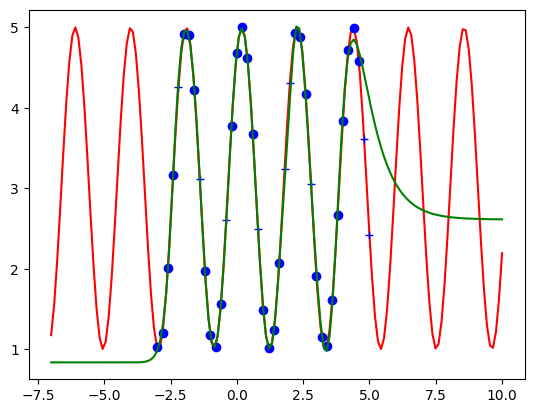

In [12]:
XX = np.linspace(-7, 10, 150).reshape(-1, 1)
plt.plot(XX, 2 * np.sin(3 * XX + 1) + 3, 'r')
plt.plot(X_train,y_train,'ob')
plt.plot(X_test, y_test,'+b')
plt.plot(XX, mlp_regressor.predict(XX),'g')


$R^2$ score is called the *coefficient of determination* of the prediction. It is defined as $(1-\frac{u}{v})$, where $u$ is the residual sum of squares `((y_true - y_pred) ** 2).sum()` and $v$ is the total sum of squares `((y_true - y_true.mean()) ** 2).sum()`. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). What is the range for $R^2$?

In [13]:
from sklearn.metrics import mean_squared_error

print("Train set MSE:", mean_squared_error(y_train, mlp_regressor.predict(X_train)))
print("Test set MSE:", mean_squared_error(y_test, mlp_regressor.predict(X_test)))

mlp_regressor.coefs_[0]

Train set MSE: 0.002528763357796818
Test set MSE: 0.39334165453101666


array([[ 1.33702185,  4.09302952, -8.5234896 ,  3.87885384,  6.70588713,
        -4.9141221 ,  5.85912648, -4.60438597, -5.63304274,  4.07340591]])

**Task:** Implement the following function that plots the evolution of MSE. Its output should be similar to ![loss evolution plot](LossEvolution.png)

**Note:** You can switch-off warnings using

    import warnings
    warnings.filterwarnings("ignore")


In [27]:
def monitor_MSE(regressor, X_train, X_test, y_train, y_test, iter_step=50):
    # Fit the regressor regressor using traing set X_train with
    # the desired outputs y_train, after each iteration compute
    # MSE for the training and test sets.
    # At the end, plot the evolution of MSE on both train and test sets.
    import warnings
    warnings.filterwarnings("ignore")
    
    max_iter = regressor.max_iter
    orig_regressor_params = regressor.get_params()
    regressor.set_params(max_iter=iter_step, warm_start=True)
    print(orig_regressor_params)

    MSE_train = []
    MSE_test = []

    for _ in range(0, max_iter, iter_step):
        regressor.fit(X_train, y_train)
        MSE_train.append(mean_squared_error(y_train, regressor.predict(X_train)))
        MSE_test.append(mean_squared_error(y_test, regressor.predict(X_test)))
    
    plt.yscale('log')
    plt.plot(range(0,max_iter,iter_step), MSE_train, 'b', label="MSE on the train set")
    plt.plot(range(0,max_iter,iter_step), MSE_test, 'r', label="MSE on the test set")
    plt.legend()

    regressor.set_params(**orig_regressor_params)
    return regressor

In [28]:
mlp_regressor  = MLPRegressor(random_state=123, 
                              hidden_layer_sizes=[10], 
                              max_iter=5000, 
                              activation='logistic',
                              solver='lbfgs',
                              early_stopping=True)
mlp_regressor = mlp_regressor.fit(X_train, y_train.ravel())

print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, y_train))

print("Train set MSE:", mean_squared_error(y_train.ravel(), mlp_regressor.predict(X_train)))
print("Test set MSE:", mean_squared_error(y_test.ravel(), mlp_regressor.predict(X_test)))

print(mlp_regressor.coefs_[0])

print("Now with monitor")

Test R^2 Score : 0.119
Training R^2 Score : 0.999
Train set MSE: 0.002528763357796818
Test set MSE: 0.39334165453101666
[[ 1.33702185  4.09302952 -8.5234896   3.87885384  6.70588713 -4.9141221
   5.85912648 -4.60438597 -5.63304274  4.07340591]]
Now with monitor


{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': [10], 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 123, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Test R^2 Score : -0.414
Training R^2 Score : 0.029
Train set MSE: 2.3429481447898732
Test set MSE: 0.6313784150960503


array([[0.06640691, 0.04760395, 0.05507365, 0.08785245, 0.06659587,
        0.04749301, 0.07153426, 0.06608416, 0.05717123, 0.05342053]])

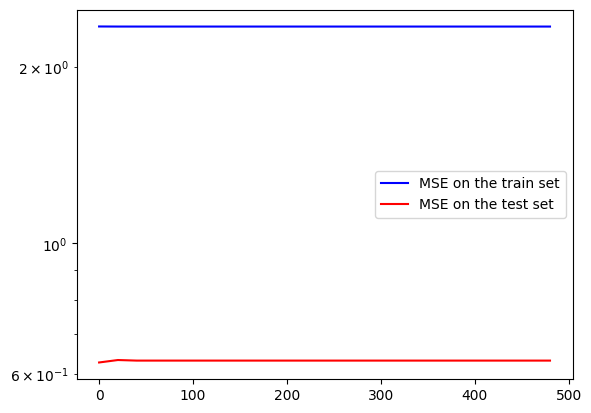

In [29]:
mlp_regressor  = MLPRegressor(random_state=123, 
                              hidden_layer_sizes=[10], 
                              max_iter=500, 
                              activation='logistic',
                              solver='lbfgs',
                              warm_start=False)
mlp_regressor = monitor_MSE(mlp_regressor, X_train, X_test, y_train.ravel(), y_test.ravel(), iter_step=20)

print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, y_train))

print("Train set MSE:", mean_squared_error(y_train, mlp_regressor.predict(X_train)))
print("Test set MSE:", mean_squared_error(y_test, mlp_regressor.predict(X_test)))

mlp_regressor.coefs_[0]

{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': [100], 'learning_rate': 'constant', 'learning_rate_init': 0.0002, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 123, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': True}
Test R^2 Score : -0.876
Training R^2 Score : 0.085
Train set MSE: 2.2085753101903647
Test set MSE: 0.8381841711223841


array([[ 0.06093292, -0.0613008 , -0.1538745 ,  0.06326382,  0.06139185,
         0.06156638,  0.39971853,  0.06100976,  0.06372703, -0.06124822,
        -0.20576048,  0.27475243, -0.06336945, -0.22614243, -0.06156405,
         0.0609546 , -0.06116533, -0.06118218,  0.06539037, -0.06509665,
         0.06233324,  0.06396719, -0.05957989,  0.06091769,  0.06466048,
        -0.06613736, -0.06233126, -0.06097652, -0.20970043, -0.06119742,
        -0.06851965, -0.06346791, -0.06101032,  0.06388924,  0.06611013,
        -0.06502573, -0.06106207,  0.06878543,  0.07321205,  0.06099159,
        -0.06457297, -0.06364211,  0.06473589, -0.06092822,  0.31294114,
        -0.18042442,  0.06224095,  0.24677289,  0.06192422,  0.06348039,
        -0.06586377,  0.06169786,  0.06172429, -0.06181476, -0.06129226,
        -0.23639359,  0.06157711,  0.06440344,  0.3302513 , -0.06101949,
         0.06092073, -0.06203265,  0.06103329, -0.06467917,  0.31200117,
        -0.07640779, -0.050041  , -0.16644985, -0.1

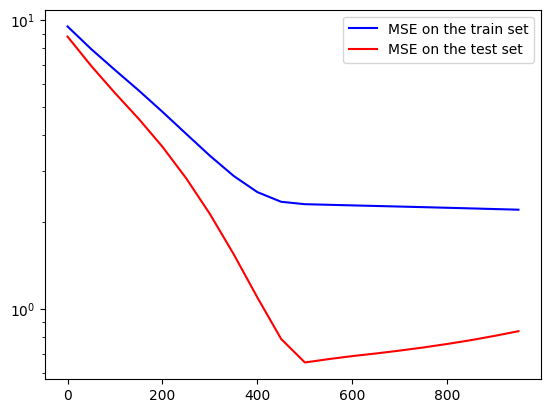

In [30]:
mlp_regressor  = MLPRegressor(random_state=123, 
                              hidden_layer_sizes=[100], 
                              max_iter=1000, 
                              activation='tanh',
                              learning_rate_init=0.0002,
                              solver='adam',
                              warm_start=True)
mlp_regressor = monitor_MSE(mlp_regressor, X_train, X_test, y_train.ravel(), y_test.ravel(), iter_step=50)

print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, y_train))

print("Train set MSE:", mean_squared_error(y_train, mlp_regressor.predict(X_train)))
print("Test set MSE:", mean_squared_error(y_test, mlp_regressor.predict(X_test)))

mlp_regressor.coefs_[0]

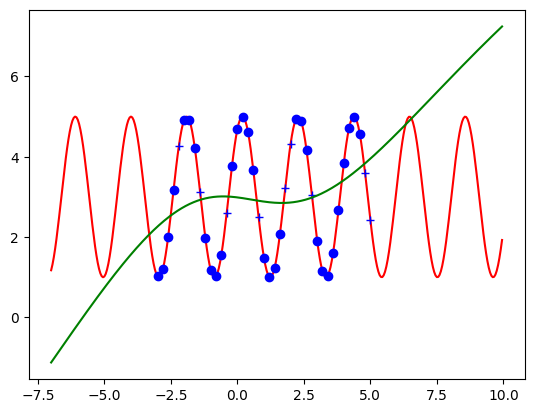

In [31]:
XX = np.arange(-7, 10, 0.05).reshape(-1, 1)
plt.plot(XX, 2 * np.sin(3 * XX + 1) + 3, 'r')
plt.plot(X_train,y_train,'ob')
plt.plot(X_test, y_test,'+b')
plt.plot(XX, mlp_regressor.predict(XX),'g')


{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': [10], 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 5000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 123, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': True}
Test R^2 Score : -0.785
Training R^2 Score : 0.996
Train set MSE: 0.009161865253189998
Test set MSE: 0.7975006702548901


array([[-0.89228903,  3.73431833, -4.54751038,  6.06811639, -0.04174975,
         1.05082394,  4.51720748,  7.71547294,  3.38865052,  5.80761199]])

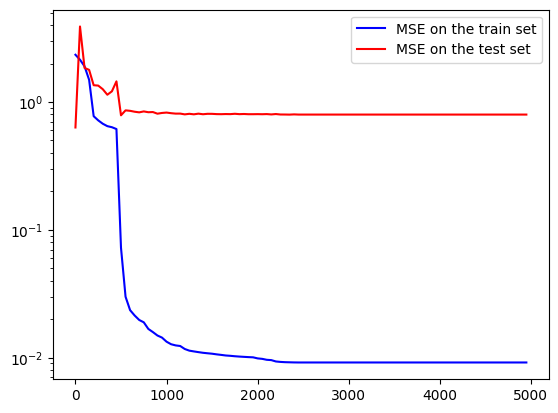

In [32]:
mlp_regressor  = MLPRegressor(random_state=123, 
                              hidden_layer_sizes=[10], 
                              max_iter=5000, 
                              activation='logistic',
                              solver='lbfgs',
                              warm_start=True)
mlp_regressor = monitor_MSE(mlp_regressor, X_train, X_test, y_train.ravel(), y_test.ravel(), iter_step=50)

print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, y_train))

print("Train set MSE:", mean_squared_error(y_train, mlp_regressor.predict(X_train)))
print("Test set MSE:", mean_squared_error(y_test, mlp_regressor.predict(X_test)))

mlp_regressor.coefs_[0]

Implement the following function that performs so called regression analysis of the trained regressor. You should obtain plots like the following ![regression plots](RegressionPlots.png)

In [67]:
def regression_analysis(regressor, X_train, X_test, y_train, y_test):
    # plot two plots: regressor predictions (y-axis) for the train 
    # set X_train against y_train (x-axis)
    # and regressor predictions (y-axis) for the test 
    # set X_test against y_test (x-axis)

    regressor.fit(X_train, y_train)
    #sort y_train by X_train
    X_train_max_indices = np.argsort(X_train, axis=0)
    X_train_sorted = X_train[X_train_max_indices.flatten()]
    y_train_sorted = y_train[X_train_max_indices.flatten()]
    X_test_max_indices = np.argsort(X_test, axis=0)
    X_test_sorted = X_test[X_test_max_indices.flatten()]
    y_test_sorted = y_test[X_test_max_indices.flatten()]


    y_preds_train = regressor.predict(X_train_sorted)
    X_test_sorted = np.sort(X_test, axis=0)
    y_preds_test = regressor.predict(X_test_sorted)
    
    plt.figure(figsize=(12,5))
    plt.title("Regression analysis")
    plt.subplot(2,2,1)
    plt.plot(X_train, y_train, 'g+', label='Train set')
    plt.plot(X_train_sorted, y_preds_train, 'r+', label='Train predictions')
    plt.legend(loc = 'upper right')
    
    plt.subplot(2,2,2)
    plt.plot(X_test, y_test, 'g+', label='Test set')
    plt.plot(X_test_sorted, y_preds_test, 'r+', label='Test predictions')
    plt.legend(loc = 'upper right')

    plt.subplot(2,2,3)
    plt.plot(X_train_sorted, y_train_sorted, 'g', label='Train set')
    plt.plot(X_train_sorted, y_preds_train, 'r', label='Train predictions')
    plt.legend(loc='upper right')

    plt.subplot(2,2,4)
    plt.plot(X_test_sorted, y_test_sorted, 'g', label='Test set')
    plt.plot(X_test_sorted, y_preds_test, 'r', label='Test predictions')
    plt.legend(loc='upper right')


    return regressor

MLPRegressor(activation='logistic', hidden_layer_sizes=[10], max_iter=5000,
             random_state=123, solver='lbfgs', warm_start=True)

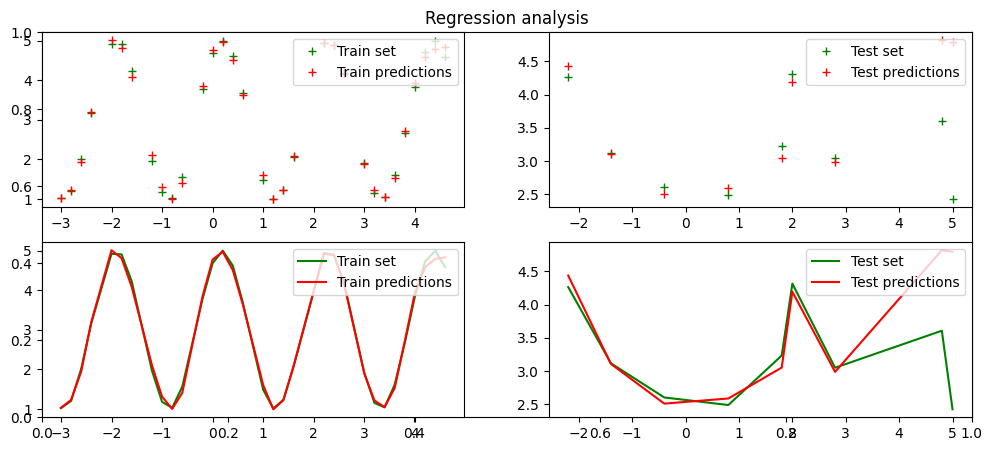

In [68]:
regression_analysis(mlp_regressor, X_train, X_test, y_train.ravel(), y_test.ravel())

## The Main Attributes of `MLPRegressor`

* `loss_` is the loss after training,
* `n_layers_` is the number of layers of the network,
* `coefs_` is a list of arrays of length `n_layers - 1`; $i$-th array is the weight matrix of layer $i$,
* `intercepts_` is a list of arrays of length `n_layers - 1`; $i$-th array is the bias vector associated with layer $i$, 
* `n_iter_` is the number of iterations the solver run,
* `out_activation_` is the name of the output layer activation function.

`MLPRegressor` uses the Square Error loss function that for an input pattern for which the network predicted $y_{pred}$ and the target value is $y_{true}$ computes $$loss(y_{pred}, y_{true},\mathbf{W}) = \frac{1}{2}\lVert y_{pred} - y_{true}\rVert_2^2 + \frac{\alpha}{2}\lVert \mathbf{W} \rVert_2^2.$$ The `loss_` attribute is then the mean value of the loss on the train set.

In [41]:
print("Loss:", mlp_regressor.loss_)

Loss: 0.007955950693685133


In [42]:
print("Number of Coefs - the weight matrices:", len(mlp_regressor.coefs_))

[weights.shape for weights in mlp_regressor.coefs_]

Number of Coefs - the weight matrices: 2


[(1, 10), (10, 1)]

In [43]:
print("Number of Intercepts - the number of vectors with biases:", len(mlp_regressor.intercepts_))

[intercept.shape for intercept in mlp_regressor.intercepts_]

Number of Intercepts - the number of vectors with biases: 2


[(10,), (1,)]

In [44]:
print("Number of Iterations for Which Estimator Ran:", mlp_regressor.n_iter_)

Number of Iterations for Which Estimator Ran: 0


In [45]:
print("Name of Output Layer Activation Function:", mlp_regressor.out_activation_)

Name of Output Layer Activation Function: identity


`MLPRegressor` has much more parameters. for a complete list see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor). We will use some of them:

* `hidden_layer_sizes` is a tuple of integers specifying sizes of hidden layers in multi layer perceptrons with default=(100,),
* `activation` specifies activation function for hidden layers. It accepts one of below strings as input. Default value is `relu`:
  * `'identity'` - No Activation. $f(x) = x$,
  * `'logistic'` - Logistic Sigmoid Function. $f(x) = \frac{1}{1 + e^-x}$,
  * `'tanh'` - Hyperbolic tangent function. $f(x) = \tanh(x)$,
  * `'relu'` - Rectified Linear Unit function. $f(x) = \max(0, x)$,

* `solver` accepts one of `'lbfgs'`, `'sgd'`, `'adam'` strings specifying which optimization solver to use for updating weights of neural network hidden layer perceptrons. default=`'adam'`,

* `learning_rate_init` specifies initial learning rate to be used. Based on value of this parameter weights of perceptrons are updated. default=`0.001`,
* `learning_rate` specifies learning rate schedule to be used for training. It accepts one of below strings as value and only applicable when solver='sgd'.
  * `'constant'` - Keeps learning rate constant through a learning process which was set in `learning_rate_init`.
  * `'invscaling'` - It gradually decreases learning rate. `effective_learning_rate = learning_rate_init / pow(t, power_t)`,
  * `'adaptive'` - It keeps learning rate constant as long as loss is decreasing or score is improving. If consecutive epochs fails in decreasing loss according 
    to `tol` parameter and `early_stopping` is on, then it divides current learning rate by 5,
    
* `batch_size` accepts integer value specifying size of batch to use for dataset. Default=`'auto'`. The default auto batch size will set batch size to `min(200, n_samples)`,

* `tol` accepts float values specifying threshold for optimization. When training loss or score is not improved by at least `tol` for `n_iter_no_change` iterations, then optimization ends if `learning_rate` is constant else it decreases learning rate if `learning_rate` is adaptive. Default=`0.0001`,

* `alpha` specifies L2 penalty coefficient to be applied to perceptrons. Default=`0.0001`,

* `momentum` specifies momentum to be used for gradient descent and accepts float value between 0-1. It's applicable when solver is `sgd`,

* `early_stopping` is a boolean value specifying whether to stop training if training score/loss is not improving. Default=`False`,

* `validation_fraction` is a float value between 0-1 specifying amount of training data to keep aside if early_stopping is set. Default=`0.1`.

## Optimizing Model by Grid Search

We have seen that MLPRegressor has many parameters. The search for a suitable 
combination of values for several parameters can be tedious. Let us collect values for
such parameters that we would like to try.

In [46]:
import itertools
from sklearn.model_selection import GridSearchCV

In [47]:
%%time

params = {'activation': ['relu', 'tanh', 'logistic'],
          'hidden_layer_sizes': list(itertools.permutations([10,20,50],2)) + [10, 20, 30, 50],
          'solver': ['adam','lbfgs'],
          'learning_rate': ['constant', 'adaptive', 'invscaling']
         }                                

CPU times: total: 0 ns
Wall time: 0 ns


In [48]:
list(itertools.permutations([10,20,50],2))

[(10, 20), (10, 50), (20, 10), (20, 50), (50, 10), (50, 20)]

Now `GridSearchCV` can try all combinations of params. For compapring the combinations we will use 5-fold cross-validation.

In [49]:
%%time

mlp_regressor_grid = GridSearchCV(MLPRegressor(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_regressor_grid.fit(X_train,y_train)

print('Train R^2 Score : %.3f'%mlp_regressor_grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%mlp_regressor_grid.best_estimator_.score(X_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%mlp_regressor_grid.best_score_)
print('Best Parameters : ',mlp_regressor_grid.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Train R^2 Score : 0.995
Test R^2 Score : -1.020
Best R^2 Score Through Grid Search : 0.852
Best Parameters :  {'activation': 'tanh', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'solver': 'lbfgs'}
CPU times: total: 4.41 s
Wall time: 42.8 s


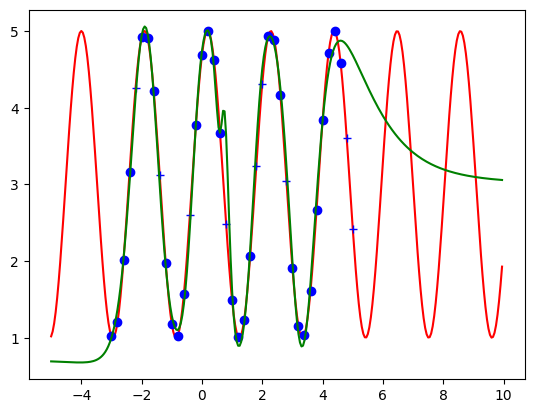

In [50]:
XX = np.arange(-5, 10, 0.05).reshape(-1, 1)
plt.plot(XX, 2 * np.sin(3 * XX + 1) + 3, 'r')
plt.plot(X_train,y_train,'ob')
plt.plot(X_test, y_test,'+b')
plt.plot(XX, mlp_regressor_grid.best_estimator_.predict(XX),'g')

Try to improve the regressor by fine-tuning the initial value for the learning rate - parameter `learning_rate_initr` - and the regularization coefficient `alpha` - L2 penalty parameter and/or different architectures for the network.

In [51]:
params = {'activation': ['relu', 'tanh', 'logistic'],
          'hidden_layer_sizes': [10, 20, 30, 40, 50],
          'solver': ['adam','lbfgs'],
          'learning_rate': ['constant', 'adaptive', 'invscaling'],
          'learning_rate_init': [0.1, 0.01, 0.001],
          'alpha': [0.00001, 0.0001, 0.001] 
         } 

In [52]:
%%time

mlp_regressor_grid = GridSearchCV(MLPRegressor(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_regressor_grid.fit(X_train,y_train)

print('Train R^2 Score : %.3f'%mlp_regressor_grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%mlp_regressor_grid.best_estimator_.score(X_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%mlp_regressor_grid.best_score_)
print('Best Parameters : ',mlp_regressor_grid.best_params_)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Train R^2 Score : 0.972
Test R^2 Score : -4.718
Best R^2 Score Through Grid Search : 0.863
Best Parameters :  {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 50, 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'lbfgs'}
CPU times: total: 11.2 s
Wall time: 1min 37s


Can you describe any strategy (heuristics) how be more efficient than the brute-force grid search?

# MLPClassifier

MLPClassifier is a classifier based on multi-layer perceptron. It differs from `MLPRegressor` mainly in the activation function at the output layer - it is logistic (sigmoid) and the output of the network is computed as the sofmax function. For classification, the target class is encoded using one-hot-encoding. For $K$ classes, the value of the class is a vector that contains exactly one value 1 and the remaining elements are zeros. E.g., let $K=4$, then 
1. class will be encoded as $(1,0,0,0)$,
2. class will be encoded as $(0,1,0,0)$,
3. class will be encoded as $(0,0,1,0)$,
4. class will be encoded as $(0,0,0,1)$.

Hence, the output layer will have $K$ neurons - $i$-th neuron corresponds to the $i$-th class. The outputs on the output layer is computes as
$$softmax(\xi_i) = \frac{e^{\xi_i}}{\sum_{j=1}^K e^{\xi_j}},$$
where $\xi_i$ is the potential at neuron $i$. The predicted class is class $i_0$ such that its corresponding value of $softmax(\xi_i)$ is maximal. We can interpret the output of the $i$-th neuron of the softmax layer as the probability of belonging to class $i$. 

Let us try a simple example. Train data we get directly from `scikit-learn` library.

In [69]:
from sklearn.datasets import load_digits

digits = load_digits()
X_digits, y_digits = digits.data, digits.target
print('Dataset Sizes : ', X_digits.shape, y_digits.shape)

Dataset Sizes :  (1797, 64) (1797,)


The description of the data is stored together with the data.

In [70]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Let us prepare train and test data. In order to have balanced train set, we will used the so-call stratified selection so that the class composition for both train and test sets will be the same. When we put 80% of samples in the train set and 20% in the test set, then for each class, 80% of samples will go into the train set and 20% in the test set.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, train_size=0.80, test_size=0.20, stratify=y_digits, random_state=123)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Train/Test Sizes :  (1437, 64) (360, 64) (1437,) (360,)


In [72]:
from sklearn.neural_network import MLPClassifier

mlp_classifier  = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, y_train)
print(mlp_classifier.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 123, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


## Training and Evaluating the Classifier

In [73]:
y_preds = mlp_classifier.predict(X_test)

print(y_preds[:15])
print(y_test[:15])

print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy : 0.983
Training Accuracy : 1.000


## Confusion Matrix

Confusion matrix is a matrix $C=(c_{ij})_{K\times K}$, where $c_{ij}$ is the number of observations known to be in class $i$ and predicted to be in class $j$. We will use the following function to plot such confusion matrices.

In [74]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_preds, K):
    # we suppose that y_test and y_preds contain numbers between 0 and K-1
    conf_mat = confusion_matrix(y_test, y_preds)
    fig = plt.figure(figsize=(8,8))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(K), range(K))
    plt.xticks(range(K), range(K))
    plt.xlabel('Predicted class')
    plt.ylabel('True class')
    plt.colorbar();
    for i in range(K):
        for j in range(K):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='r')

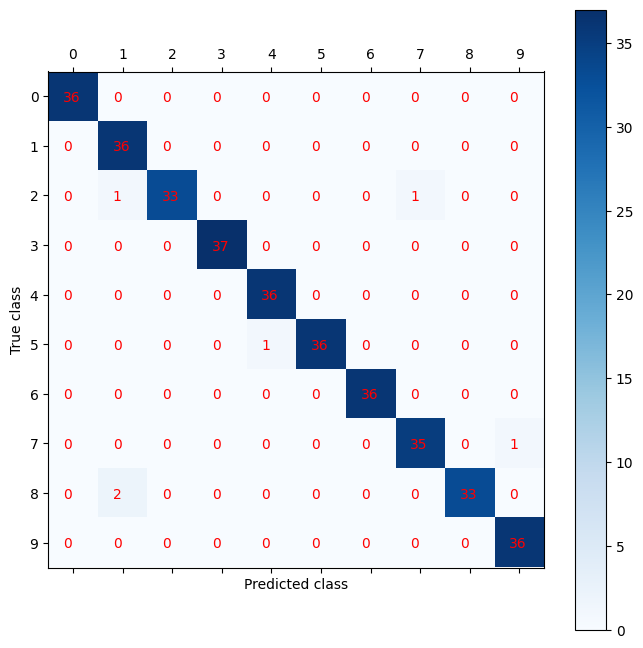

In [75]:
plot_confusion_matrix(y_test, mlp_classifier.predict(X_test), 10)

## The Main Attributes of `MLPClassifier`

The attributes of `MLPClassifier` and `MLPRegressor` are almost the same. The main difference is in the loss function.

`MLPClassifier` uses the cross-entropy loss function. For binary classification if the network predicted $y_{pred}$ and the target value was $y_{true}$, then the loss is
$$loss(y_{pred}, y_{true},\mathbf{W}) = -y_{true} \ln y_{pred} - (1-y_{true}) \ln (1 - y_{pred}) + \frac{\alpha}{2}\lVert \mathbf{W} \rVert_2^2.$$ 

In case of more than two classes, let the true labels for a set of samples be encoded as a 1-of-K binary indicator matrix $Y$, i.e., $y_{i,k}=1$ if sample $i$ has label $k$ from a set of $K$ labels. Let $P$ be a matrix of probability estimates $p_{i,k}= \mathrm{Pr}(y_{i,k}=1)$. Then the log-loss of the whole set is
$$loss(y_{pred}, y_{true},\mathbf{W}) = - \log \mathrm{Pr}(Y |P)  + \frac{\alpha}{2}\lVert \mathbf{W} \rVert_2^2 = - \frac{1}{N}\sum_{i=0}^{N-1}\sum_{k=0}^{K-1} y_{i,k} \log p_{i.k}  + \frac{\alpha}{2}\lVert \mathbf{W} \rVert_2^2,$$ where $N$ is the number of samples.

In [76]:
print("Loss:", mlp_classifier.loss_)

Loss: 0.0034728684994180595


In [77]:
print("Number of Coefs - the weight matrices:", len(mlp_classifier.coefs_))

[weights.shape for weights in mlp_classifier.coefs_]

Number of Coefs - the weight matrices: 2


[(64, 100), (100, 10)]

In [78]:
print("Number of Intercepts - the number of vectors with biases:", len(mlp_classifier.intercepts_))

[intercept.shape for intercept in mlp_classifier.intercepts_]

Number of Intercepts - the number of vectors with biases: 2


[(100,), (10,)]

In [79]:
print("Number of Iterations for Which Estimator Ran:", mlp_classifier.n_iter_)

Number of Iterations for Which Estimator Ran: 125


In [80]:
print("Name of Output Layer Activation Function:", mlp_regressor.out_activation_)

Name of Output Layer Activation Function: identity


## `GridSearchCV`

Again we can try to optimize the model using GridSearchCV.

In [81]:
%%time

from sklearn.model_selection import GridSearchCV

params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling']
         }

mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_classif_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Train Accuracy : 1.000
Test Accuracy : 0.986
Best Accuracy Through Grid Search : 0.980
Best Parameters :  {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
CPU times: total: 16.5 s
Wall time: 7min 23s


## Plotting Confusion Matrix

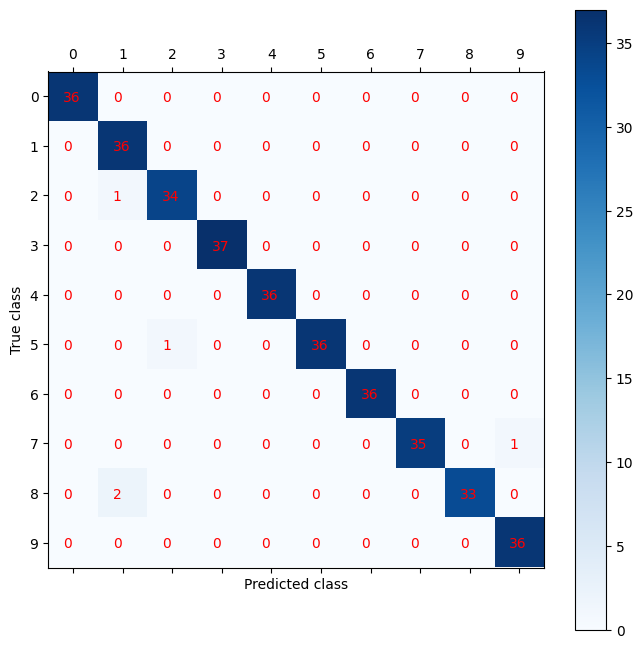

In [82]:
plot_confusion_matrix(y_test, mlp_classif_grid.best_estimator_.predict(X_test), 10)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=936847e6-8769-4eca-a578-6e1b2af8cac4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>